In [431]:
# import libraries
import pandas as pd
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from collections import Counter
from scipy import stats
import seaborn as sns
from sklearn.datasets import make_blobs
from numpy.polynomial import polynomial as poly

In [432]:
# import the final merged dataset from previous notebook
# %run ./DataSetFinal.ipynb


# For easy analysis, we will import the final merged dataset FinalMerge.csv
dataSet= pd.read_csv('FinalMerge.csv', sep=',')
dataSet= dataSet.drop(columns=['Unnamed: 0'])
#dataSet.head()

In [433]:
# Seperating Male-Female dataset
male = dataSet[dataSet['Gender'] == ' Male']
female = dataSet[dataSet['Gender'] == ' Female']
#female.head()

In [434]:
# Defining function 
def mergeralpha(data):
    namelist = []
    default = 'other'
    for c in range(len(male)):
        try:
            namelist.append(data[c])
        except:
            namelist.append(default)

    namelist = str(namelist).replace("'", "")
    namelist = str(namelist).replace("[", "")
    namelist = str(namelist).replace("]", "")
    namelist = namelist.split(',')
    for m in range(len(namelist)):
        namelist[m] = namelist[m].strip()
    myCounter = Counter(namelist)
    #myCounter = myCounter.most_common()

    return namelist, myCounter

In [435]:
# Defining function 
def mergeryear(data):
    namelist = []
    default = '2019'
    for c in range(len(male)):
        try:
            namelist.append(data[c])
        except:
            namelist.append(default)

    namelist = str(namelist).replace("'", "")
    namelist = str(namelist).replace("[", "")
    namelist = str(namelist).replace("]", "")
    namelist = namelist.split(',')
    for m in range(len(namelist)):
        namelist[m] = namelist[m].strip()
    myCounter = Counter(namelist)
    #myCounter = myCounter.most_common()

    return namelist, myCounter

In [436]:
maleCountryList, maleCountryCounter = mergeralpha(male.Countries)
femaleCountryList, femaleCountryCounter = mergeralpha(female.Countries)
maleAlbumYear, maleAlbumYearCounter = mergeryear(male.Release_Years)
femaleAlbumYear, femaleAlbumYearCounter = mergeryear(female.Release_Years)
maleGigYear, maleGigYearCounter = mergeryear(male.ConcertYears)
femaleGigYear, femaleGigYearCounter = mergeryear(female.ConcertYears)

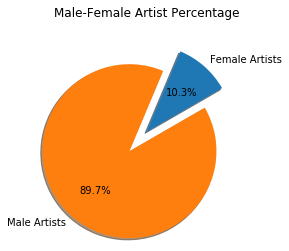

In [437]:
# Male-Female Artist Percentage
maleCount= len(male)
femaleCount= len(female)

malePercentage= (maleCount/(maleCount+femaleCount))*100
femalePercentage= (femaleCount/(maleCount+femaleCount))*100

# Plot
mfPercentage = [femalePercentage, malePercentage]
labelname = 'Female Artists','Male Artists'
explode = (0, 0.3)
fig= plt.pie(mfPercentage, labels=labelname, autopct='%1.1f%%', explode= explode, shadow=True, startangle=30, textprops=dict(color="black"))
plt.title('Male-Female Artist Percentage')
fig1 = plt.gcf()
plt.show()
fig1.savefig('mfArtistPercentage.png')

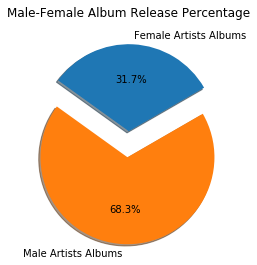

In [438]:
# Ratio of Album releases between Men and Women
maleAlbums= sum(male['AlbumCount'])
femaleAlbums= sum(female['AlbumCount'])
maleAlbumPercentage= (maleAlbums/len(male))*100
femaleAlbumPercentage= (femaleAlbums/len(female))*100

# Plot
mfAlbumPercentage = [femaleAlbumPercentage, maleAlbumPercentage]
labelname = 'Female Artists Albums','Male Artists Albums'
explode = (0, 0.3)
fig= plt.pie(mfAlbumPercentage, labels=labelname, autopct='%1.1f%%', explode= explode, shadow=True, startangle=30, textprops=dict(color="black"))
plt.title('Male-Female Album Release Percentage')
fig1 = plt.gcf()
plt.show()
fig1.savefig('mfAlbumPercentage.png')

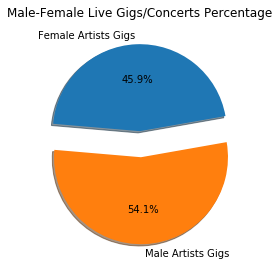

In [439]:
# Ratio of Gigs between Men and Women
maleGigs= sum(male['GigCount'])
femaleGigs= sum(female['GigCount'])
maleGigsPercentage= (maleGigs/len(male))*100
femaleGigsPercentage= (femaleGigs/len(female))*100

# Plot
mfGigsPercentage = [femaleGigsPercentage, maleGigsPercentage]
labelname = 'Female Artists Gigs','Male Artists Gigs'
explode = (0, 0.3)
fig= plt.pie(mfGigsPercentage, labels=labelname, autopct='%1.1f%%', explode= explode, shadow=True, startangle=10, textprops=dict(color="black"))
plt.title('Male-Female Live Gigs/Concerts Percentage')
fig1 = plt.gcf()
plt.show()
fig1.savefig('mfGigsPercentage.png')

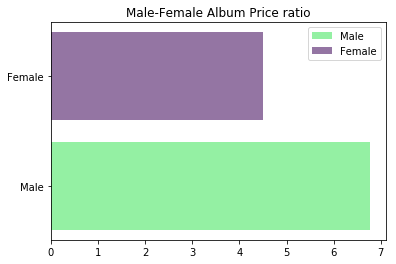

In [440]:
#ratio between the average release prices between Men and Women

maleAvgPrice= sum(male['AvgPrice'])
femaleAvgPrice= sum(female['AvgPrice'])
malereleaseAvgPrice= (maleAvgPrice/len(male))
femalereleaseAvgPrice= (femaleAvgPrice/len(female))

mfreleaseAvgPrice=[malereleaseAvgPrice,femalereleaseAvgPrice]
x = ['Male','Female']
plt.barh(x[0],malereleaseAvgPrice,color = (0.3,0.9,0.4,0.6),label='Male')
plt.barh(x[1],femalereleaseAvgPrice,color = (0.3,0.1,0.4,0.6),label='Female')
plt.legend()
plt.title('Male-Female Album Price ratio')
fig1 = plt.gcf()

plt.show()
fig1.savefig('mfPriceRatio.png')

In [441]:
malereleaseAvgPrice

6.76431495103986

In [442]:
femalereleaseAvgPrice

4.501377572531606

In [443]:
#Male Gig and Female Gig 

m_ys = list(maleGigYearCounter.values())
m_xs = list(maleGigYearCounter.keys())
for m in range(len(m_xs)):
    m_xs[m]=int(m_xs[m])

f_ys = list(femaleGigYearCounter.values())
f_xs = list(femaleGigYearCounter.keys())
for f in range(len(f_xs)):
    f_xs[f]=int(f_xs[f])

mxslope, mxintercept, mxr_value, mxp_value, mxstd_error = stats.linregress(m_xs, m_ys)
mxreg_line = [mxslope*x + mxintercept for x in m_xs]


fxslope, fxintercept, fxr_value, fxp_value, fxstd_error = stats.linregress(f_xs, f_ys)
fxreg_line = [fxslope*x + fxintercept for x in f_xs]

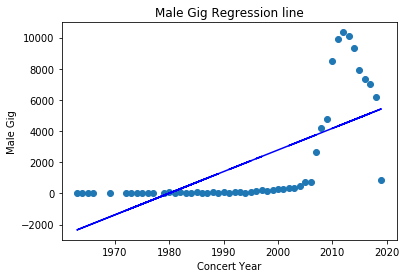

In [444]:
#plotting male gig regression line

fit = np.polyfit(m_xs,m_ys,3)
fit_mn = np.poly1d(fit)
plt.scatter(m_xs,m_ys)
#plt.plot(m_xs, mxreg_line, 'b',m_xs,fit_mn(m_xs),'oy')
plt.plot(m_xs, mxreg_line, 'b')
plt.xlabel('Concert Year')
plt.ylabel('Male Gig')
plt.title('Male Gig Regression line')
fig= plt.gcf()
plt.show()
fig.savefig('mgigregression.png')

In [445]:
mxslope 

138.66899241285793

In [446]:
mxstd_error

21.30343917053681

In [447]:
mxintercept

-274553.2440523405

In [448]:
mxr_value

0.677273340409315

In [449]:
mxp_value

3.516552535990507e-08

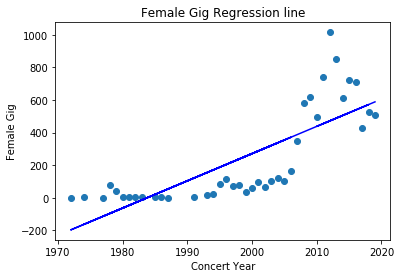

In [450]:
#plotting female gig regression line
fit = np.polyfit(f_xs,f_ys,3)
fit_fn = np.poly1d(fit)
plt.scatter(f_xs,f_ys)
#plt.plot(f_xs, fxreg_line,'b',f_xs,fit_fn(f_xs),'oy')
plt.plot(f_xs, fxreg_line,'b')
plt.xlabel('Concert Year')
plt.ylabel('Female Gig')
plt.title('Female Gig Regression line')
fig2 = plt.gcf()
plt.show()
fig2.savefig('fgigregression.png')

In [451]:
fxslope

16.718529359078794

In [452]:
fxintercept

-33165.967769737494

In [453]:
fxr_value

0.7797109056777264

In [454]:
fxp_value

3.0479763434651414e-09

In [455]:
fxstd_error

2.177929887771917

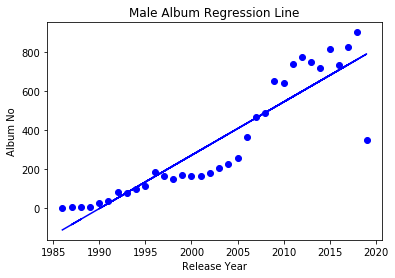

In [456]:
#plotting the Gender Gap in terms of Album Year 

m_ys = list(maleAlbumYearCounter.values())
m_xs = list(maleAlbumYearCounter.keys())
for m in range(len(m_xs)):
    m_xs[m]=int(m_xs[m])

f_ys = list(femaleAlbumYearCounter.values())
avg = sum(f_ys)/len(f_ys)
for i in range(len(f_ys)):
    if f_ys[i]/avg > 5:
        f_ys[i] = round(avg)
f_xs = list(femaleAlbumYearCounter.keys())
for f in range(len(f_xs)):
    f_xs[f]=int(f_xs[f])

mxslope, mxintercept, mxr_value, mxp_value, mxstd_error = stats.linregress(m_xs, m_ys)
mxreg_line = [mxslope*x + mxintercept for x in m_xs]


fxslope, fxintercept, fxr_value, fxp_value, fxstd_error = stats.linregress(f_xs, f_ys)
fxreg_line = [fxslope*x + fxintercept for x in f_xs]

#plot album year according to male regression line
fit = np.polyfit(m_xs,m_ys,3)
fit_fn = np.poly1d(fit)

plt.scatter(m_xs,m_ys,c='b')
#plt.plot(m_xs, mxreg_line,'b',m_xs,fit_fn(m_xs),'oy')
plt.plot(m_xs, mxreg_line,'b')
plt.xlabel('Release Year')
plt.ylabel('Album No')
plt.title('Male Album Regression Line')
fig3 = plt.gcf()
plt.show()
fig3.savefig('malbumregression.png')

In [457]:
mxslope

27.313216195569144

In [458]:
mxintercept

-54353.92131398016

In [459]:
mxr_value

0.9097865936307804

In [460]:
mxp_value

9.21522917795291e-14

In [461]:
mxstd_error

2.2028568770508743

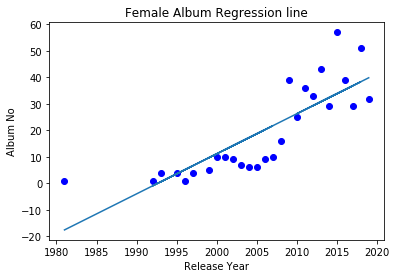

In [462]:
#plot album year according to female regression line
fit = np.polyfit(f_xs,f_ys,3)
fit_fn = np.poly1d(fit)
plt.scatter(f_xs,f_ys,c='b')
#plt.plot(f_xs, fxreg_line,f_xs,fit_fn(f_xs),'oy')
plt.plot(f_xs, fxreg_line)
plt.xlabel('Release Year')
plt.ylabel('Album No')
plt.title('Female Album Regression line')
fig4 = plt.gcf()
plt.show()
fig4.savefig('falbumregression.png')



In [463]:
fxslope

1.5114704713983054

In [464]:
fxintercept

-3011.8350271451277

In [465]:
fxr_value

0.8250010954459551

In [466]:
fxp_value

1.198498569188691e-07

In [467]:
fxstd_error

0.2070734252505506

In [468]:
# plotting a distribution for male on the basis of concert year

for m in range(len(maleGigYear)):
    maleGigYear[m]=int(maleGigYear[m])
    
for m in range(len(femaleGigYear)):
    femaleGigYear[m]=int(femaleGigYear[m])

In [469]:
#maleGigYear

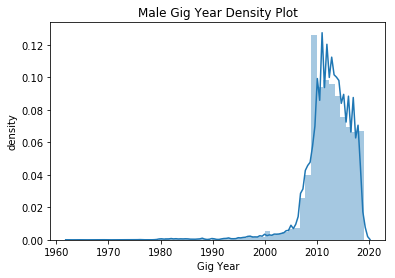

In [470]:
sns_plot = sns.distplot(maleGigYear)
fig = sns_plot.get_figure()
plt.xlabel('Gig Year')
plt.ylabel('density')
plt.title('Male Gig Year Density Plot')
fig.savefig("densitymaleGigYear")

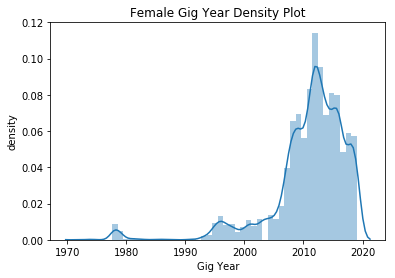

In [471]:
sns_plot = sns.distplot(femaleGigYear)
fig = sns_plot.get_figure()
plt.xlabel('Gig Year')
plt.ylabel('density')
plt.title('Female Gig Year Density Plot')
fig.savefig("densityfemaleGigYear")

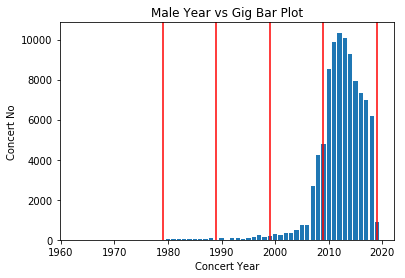

In [472]:
#plotting male Gig vs year bar plot

maleGigYear = Counter(maleGigYear)
plt.bar(maleGigYear.keys(),maleGigYear.values())
plt.xlabel('Concert Year')
plt.ylabel('Concert No')
plt.title('Male Year vs Gig Bar Plot')
xcoords = [1979,1989, 1999, 2009, 2019]
colors = ['r','r','r','r','r']
for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc,c=c)
fig1 = plt.gcf()
plt.show()
fig1.savefig('mgigbarplot.png')

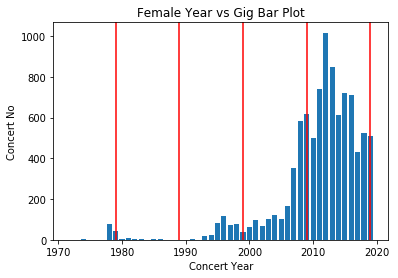

In [473]:
#plotting female Gig vs year bar plot

femaleGigYear = Counter(femaleGigYear)
plt.bar(femaleGigYear.keys(),femaleGigYear.values())
plt.xlabel('Concert Year')
plt.ylabel('Concert No')
plt.title('Female Year vs Gig Bar Plot')
xcoords = [1979,1989, 1999, 2009, 2019]
colors = ['r','r','r','r','r']
for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc,c=c)
fig1 = plt.gcf()
plt.show()
fig1.savefig('fgigbarplot.png')

In [474]:
for m in range(len(maleAlbumYear)):
    maleAlbumYear[m]=int(maleAlbumYear[m])
    
for m in range(len(femaleAlbumYear)):
    femaleAlbumYear[m]=int(femaleAlbumYear[m])


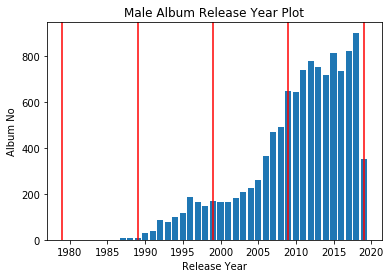

In [475]:
#Plotting Male Album release year

maleAlbumYear = Counter(maleAlbumYear)
plt.bar(maleAlbumYear.keys(),maleAlbumYear.values())
plt.xlabel('Release Year')
plt.ylabel('Album No')
plt.title('Male Album Release Year Plot')
xcoords = [1979,1989, 1999, 2009, 2019]
colors = ['r','r','r','r','r']
for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc,c=c)
fig1 = plt.gcf()
plt.show()
fig1.savefig('malbumbarplot.png')

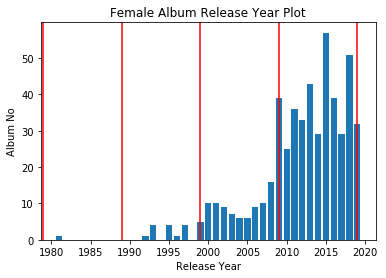

In [476]:
#Plotting ale Album release year

femaleAlbumYear = Counter(femaleAlbumYear)
f_ys = list(femaleAlbumYear.values())
avg = sum(f_ys)/len(f_ys)
for i in range(len(f_ys)):
    if f_ys[i]/avg > 5:
        f_ys[i] = round(avg)
plt.bar(femaleAlbumYear.keys(),f_ys)
plt.xlabel('Release Year')
plt.ylabel('Album No')
plt.title('Female Album Release Year Plot')
xcoords = [1979,1989, 1999, 2009, 2019]
colors = ['r','r','r','r','r']
for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc,c=c)
fig1 = plt.gcf()
plt.show()
fig1.savefig('falbumbarplot.png')


In [477]:
#femaleAlbumYear

In [478]:
#male country count  
#female country count

mcc=Counter(maleCountryList)
fcc= Counter(femaleCountryList)

labelname ='Female percentage','Male percentage'

USAgigs = [fcc['us'], mcc['us']]
UKgigs = [fcc['uk'], mcc['uk']]
Croatiagigs = [fcc['croatia'], mcc['croatia']]
DEgigs = [fcc['germany'], mcc['germany']]
FRgigs = [fcc['france'], mcc['france']]
AUSgigs = [fcc['australia'], mcc['australia']] 

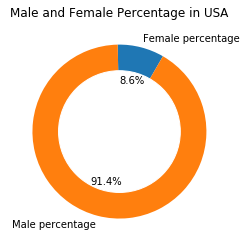

In [479]:
#plotting male-female ratio in top 5 countries (according to artist number)

circle= plt.Circle( (0,0), 0.7, color= 'white' )
plt.pie(USAgigs,labels=labelname ,autopct='%1.1f%%', startangle= 60)
plt.title('Male and Female Percentage in USA')
fig1 = plt.gcf()
fig1.gca().add_artist(circle)
plt.show()
fig1.savefig('mfUSApercentage.png')

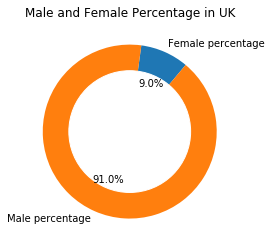

In [480]:
circle= plt.Circle( (0,0), 0.7, color= 'white' )
plt.pie(UKgigs,labels=labelname ,autopct='%1.1f%%', startangle= 50)
plt.title('Male and Female Percentage in UK')
fig2 = plt.gcf()
fig2.gca().add_artist(circle)
plt.show()
fig2.savefig('mfUKpercentage.png')

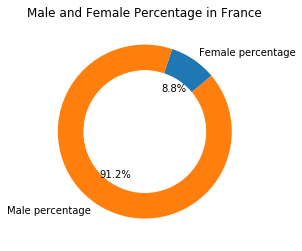

In [481]:
circle= plt.Circle( (0,0), 0.7, color= 'white' )
plt.pie(FRgigs,labels=labelname ,autopct='%1.1f%%', startangle= 40)
plt.title('Male and Female Percentage in France')
fig3 = plt.gcf()
fig3.gca().add_artist(circle)
plt.show()
fig3.savefig('mfFRpercentage.png')

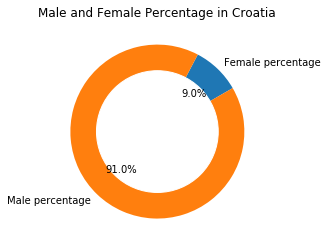

In [482]:
circle= plt.Circle( (0,0), 0.7, color= 'white' )
plt.pie(Croatiagigs,labels=labelname ,autopct='%1.1f%%', startangle= 30)
plt.title('Male and Female Percentage in Croatia')
fig4 = plt.gcf()
fig4.gca().add_artist(circle)
plt.show()
fig4.savefig('mfCroatiapercentage.png')

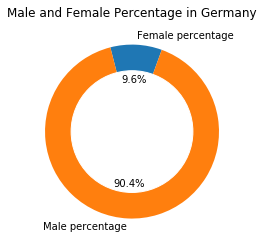

In [483]:
circle= plt.Circle( (0,0), 0.7, color= 'white' )
plt.pie(DEgigs,labels=labelname ,autopct='%1.1f%%', startangle= 70)
plt.title('Male and Female Percentage in Germany')
fig5 = plt.gcf()
fig5.gca().add_artist(circle)
plt.show()
fig5.savefig('mfDEpercentage.png')

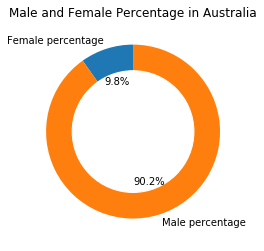

In [484]:
circle= plt.Circle( (0,0), 0.7, color= 'white' )
plt.pie(AUSgigs,labels=labelname ,autopct='%1.1f%%', startangle= 90)
plt.title('Male and Female Percentage in Australia')
fig6 = plt.gcf()
fig6.gca().add_artist(circle)
plt.axis
plt.show()
fig6.savefig('mfAUSpercentage.png')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001853FA70CF8>,
      dtype=object)

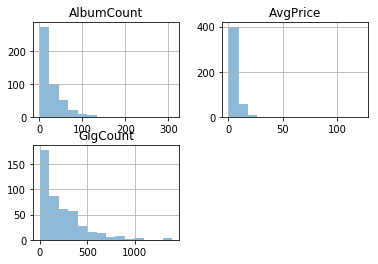

In [485]:
dataSet.hist(bins=14, alpha=0.5)

In [486]:
dataSet.corr()

,GigCount,AlbumCount,AvgPrice
GigCount,1.000000,0.203548,-0.063374
AlbumCount,0.203548,1.000000,0.021631
AvgPrice,-0.063374,0.021631,1.000000


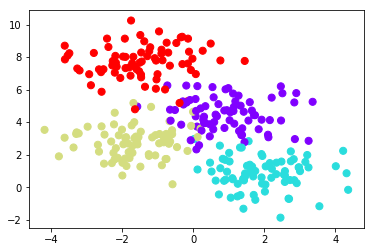

In [487]:
maleCountryList, femaleCountryList = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(maleCountryList[:, 0], maleCountryList[:, 1], c=femaleCountryList, s=50, cmap='rainbow')

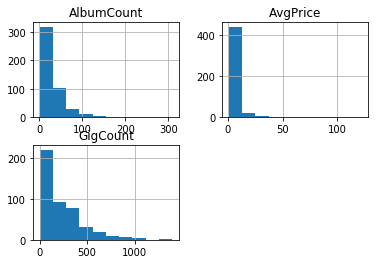

In [488]:
dataSet.hist()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001853BB1FA58>,
      dtype=object)

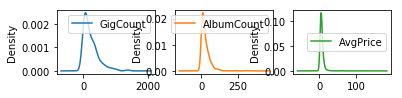

In [489]:
dataSet.plot(kind='density', subplots=True, layout=(3,3), sharex= False)